# Triangle diagram
In this notebook, I calculate a triangle diagram for an arbitrary case
Internal masses are noted $m_i$, $i=1,2,3$, The symmetric external masses are noted by $M_i$, $i=1,2,3$.

The fuction ```Isc(m1sq,m2sq,m3sq,M1sq,M2sq,M3sq)``` calculates amplitude for the triangle graph, shown in the figure below.
![Triangle diagram to introduce notations](pict/triangle.png)

In [3]:
using QuadGK
using Plots
using IJulia
using Interact;

$$
A(\sigma\equiv M_1^2,s\equiv M_3^2) = \frac{1}{16\pi^2}\int_0^1\frac{\mathrm{d}x}{\sigma\,(y_1-y_2)}
\left[
\log\frac{1-x-y_2}{-y_2}-
\log\frac{1-x-y_1}{-y_1}
\right]
\quad
\text{with}\quad y_{1,2} = y_{1,2}(s,\sigma,x).
$$


In [4]:
function Isc(m1sq, m2sq, m3sq, M1sq, M2sq, M3sq)
    function integrand(x)
        A = M1sq;
        B = m2sq + x*M2sq - (1-x)*M1sq - x*M3sq-m3sq;
        C = x*m1sq + (1-x)*m3sq - x*(1-x)*M2sq;
        D = B^2-4*A*C;
        y1, y2 = (-B .- sqrt(D) .* [1.0, -1.0]) ./ (2*A);
        return (log((1-x-y2)/(-y2))-log((1-x-y1)/(-y1)))/(A*(y2-y1))
    end
    integr = quadgk(integrand, 0, 1)[1];
    return integr/(16*π^2);
end;

Isc (generic function with 1 method)

## Singularity in $\sigma\equiv M_1^2$

This singularity appears in decays: the total invariant mass ($M_3^2\equiv s$) is fixed,
the amplitude is a function of the Dalitz plot variable.

In [43]:
@manipulate for M3 = slider(range(4,6,length=200), label="M3", value = 3.0)
    M3sq = M3^2
    M1 = range(2,4; length=100)
    #
    m1sq = 4^2-1e-3im;
    m2sq = 1^2;
    m3sq = 2^2;
    M2sq = 1^2;
    amp = Isc.(m1sq,m2sq,m3sq,M1.^2,M2sq,M3sq)
    #
    plot(M1,real(amp), lab="Re A", size=(700,500), lw=2, color_palette=:auto)
    plot!(M1,imag(amp), lab="Im A", lw=2, xlab="M1 (units)")
    #
    vline!([3],lab="threshold: m2+m3", l=(1, :dash, :black))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["M3"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>200,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\mikha\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\mikha\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\mikha\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\mikha\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\mikha\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x0000000008dff0f0])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"4.0\",\"4.01005\",\"4.0201\",\"4.03015\",\"4.0402\",\"4.05025\",\"4.0603\",\"4.07035\",\"4.0804\",\"4.09045\",\"4.1005\",\"4.11055\",\"4.1206\",\"4.13065\",\"4.1407\",\"4.15075\",\"4.1608\",\"4.17085\",\"4.1809\",\"4.19095\",\"4.20101\",\"4.21106\",\"4.22111\",\"4.23116\",\"4.24121\",\"4.25126\",\"4.26131\",\"4.27136\",\"4.28141\",\"4.29146\",\"4.30151\",\"4.31156\",\"4.32161\",\"4.33166\",\"4.34171\",\"4.35176\",\"4.36181\",\"4.37186\",\"4.38191\",\"4.39196\",\"4.40

## Singularity in $s\equiv M_3^2$

There is a prominent resonance near threshold in the final state that fixes mass, $M_1^2\equiv \sigma$.
The amplitude as a function of the total invariant mass might show up the singularity.

In [44]:
@manipulate for M1 = slider(range(2.5,3.5,length=200), label="M1", value = 2.5)
    M1sq = M1^2
    M3 = range(4,6; length=100)
    #
    m1sq = 4^2-1e-3im;
    m2sq = 1^2;
    m3sq = 2^2;
    M2sq = 1^2;
    amp = Isc.(m1sq,m2sq,m3sq,M1sq,M2sq,M3.^2)
    #
    plot(M3,real(amp), lab="Re A", size=(700,500), lw=2, color_palette=:auto)
    plot!(M3,imag(amp), lab="Im A", lw=2, xlab="M3 (units)")
    #
    vline!([5],lab="threshold: m1+m2", l=(1, :dash, :black))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["M1"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>200,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Any} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\mikha\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\mikha\\.julia\\packages\\Knockout\\1sDlc\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\mikha\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\mikha\\.julia\\packages\\InteractBase\\9mFwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\mikha\\.julia\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Condition(Any[Task (runnable) @0x0000000008e542f0])), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"2.5\",\"2.50503\",\"2.51005\",\"2.51508\",\"2.5201\",\"2.52513\",\"2.53015\",\"2.53518\",\"2.5402\",\"2.54523\",\"2.55025\",\"2.55528\",\"2.5603\",\"2.56533\",\"2.57035\",\"2.57538\",\"2.5804\",\"2.58543\",\"2.59045\",\"2.59548\",\"2.6005\",\"2.60553\",\"2.61055\",\"2.61558\",\"2.6206\",\"2.62563\",\"2.63065\",\"2.63568\",\"2.6407\",\"2.64573\",\"2.65075\",\"2.65578\",\"2.6608\",\"2.66583\",\"2.67085\",\"2.67588\",\"2.6809\",\"2.68593\",\"2.69095\",\"2.69598\",\"2.70

# Several examples

## Triangle for the $a_1(1420)$
Please find details in a paper by Mikhasenko at.al [Phys.Rev. D91 (2015) no.9, 094015]

In [3]:
ell = LinRange(1.3,1.6,100)
mπ = 0.139;
mKp = 0.4936;
mKs = 0.892;
ΓKs = 0.001;  # to demonstrate it better
mf0 = 0.99;
data_a1 = [Isc(mKs^2-1im*mKs*ΓKs,mKp^2,mKp^2,mf0^2,mπ^2,e^2) for e in ell];

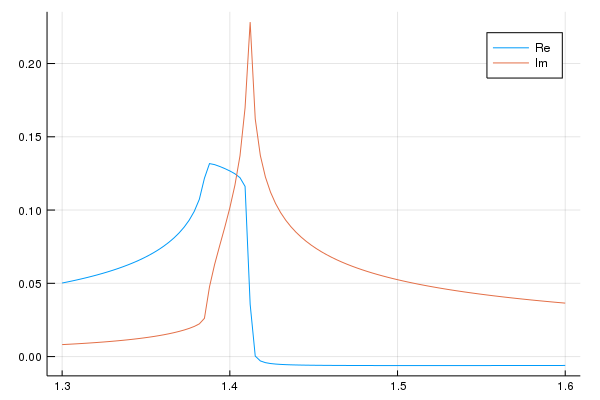

In [4]:
plot(ell,real(data_a1), lab="Re")
plot!(ell,imag(data_a1), lab="Im")

## Triangle for $Z_c(3900)$
see details in the paper by Alessandro Pilloni et.al. [Phys.Lett. B772 (2017) 200-209].
In the paper, a different method was used for the calculation while the result is the same.

In [5]:
ell = LinRange(3.65,4.10,150)
mπ = 0.139
mDbar = 1.848
mD1 = 2.42
ΓD1 = 0.002  # to demonstrate it better
mY = 4.26
mDs = 2.007
data_zc = [Isc(mD1^2-1im*mD1*ΓD1,mDbar^2,mDs^2,e^2,mπ^2,mY^2) for e in ell];

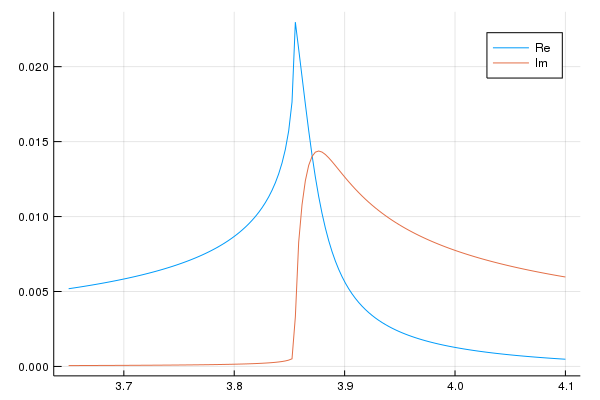

In [7]:
plot(ell,[real(data_zc) imag(data_zc)], lab=["Re" "Im"])

## Triangle for $P_c(4450)$
The considered reaction is
$$
\Lambda_b \to (K\,p)\, \chi_{c1} \to K (J/\psi\, p)
$$

For the existing $Kp$-resonance $\Lambda(1890)$, the enhansement is strong but still on the threshold. 

In [8]:
ell = LinRange(4.1,5.2,250)
mΧc1 = 3.510
mp = 0.938
mΛb = 5.619
mΛ = 1.89
mKp = 0.4936;
data_Pc = [Isc(mΛ^2-1im*0.001,mΧc1^2,mp^2,e^2,mKp^2,mΛb^2) for e in ell];

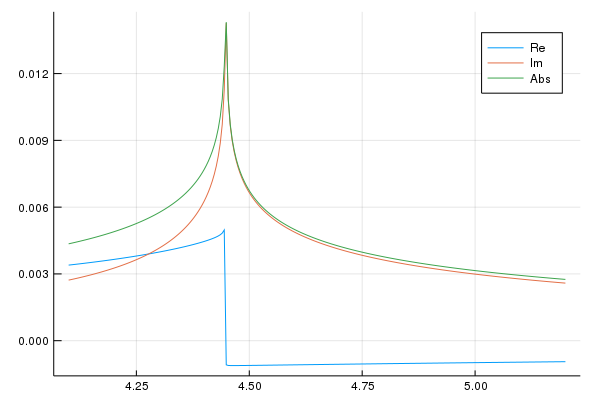

In [9]:
plot(ell,real(data_Pc), lab="Re")
plot!(ell,imag(data_Pc), lab="Im")
plot!(ell,abs.(data_Pc), lab="Abs")

The triangle singularity shows up for the higher values of the exchange mass. 

In [10]:
ell = LinRange(4.1,5.2,250)
mΧc1 = 3.510
mp = 0.938
mΛb = 5.619
mΛ = 2.07
mKp = 0.4936;
data_Pc = [Isc(mΛ^2-1im*0.001,mΧc1^2,mp^2,e^2,mKp^2,mΛb^2) for e in ell];

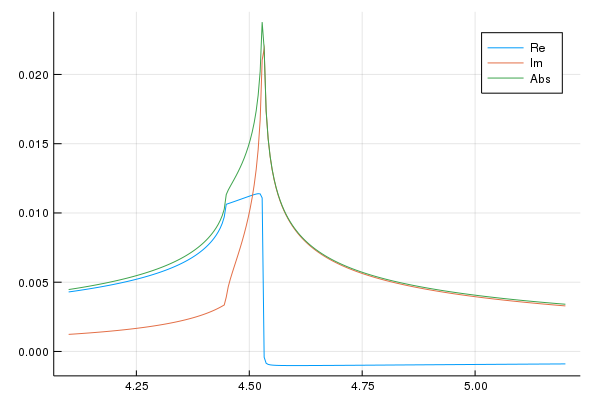

In [11]:
plot(ell,real(data_Pc), lab="Re")
plot!(ell,imag(data_Pc), lab="Im")
plot!(ell,abs.(data_Pc), lab="Abs")